In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Epileptic Seizure Recognition.csv')

In [ ]:
df

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [ ]:
x= df.drop(["y"], axis=1)
y= df["y"]

In [ ]:
signal = x.sample(1).values.flatten()

In [ ]:
len(signal)

179

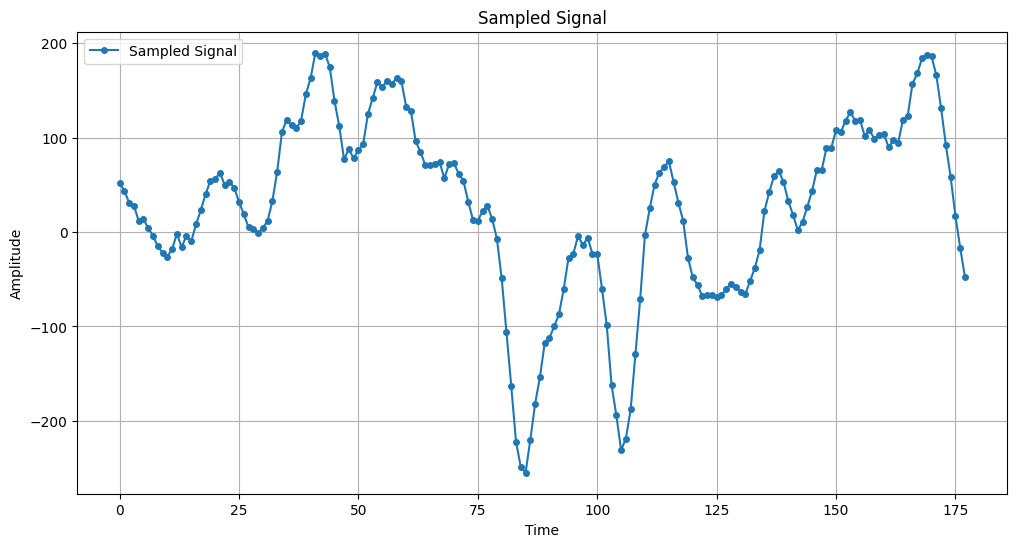

In [ ]:

signal_numeric = pd.to_numeric(signal, errors='coerce')
signal_numeric = signal_numeric[~np.isnan(signal_numeric)]

plt.figure(figsize=(12, 6))
plt.plot(
    np.arange(len(signal_numeric)),
    signal_numeric,
    marker="o",
    linestyle="-",
    markersize=4,
    label="Sampled Signal",
)

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Sampled Signal")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
def plot(data, df, color, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    fig = ax.figure
    fig.set_facecolor((0, 0, 1, 0.4))

    ax.plot(df[data], linestyle='-', color=color, alpha=0.4)
    ax.set_xlabel("Time")
    ax.set_ylabel(data)
    ax.grid(True)

    if ax is None:
        plt.show()

In [ ]:
w = 100
t = np.linspace(0, 11500, 11500)
sin = 1000*np.sin(2 * np.pi * w * t)

In [ ]:
len(t)

11500

In [ ]:
# plt.plot(sin)

In [ ]:
len(sin)

11500

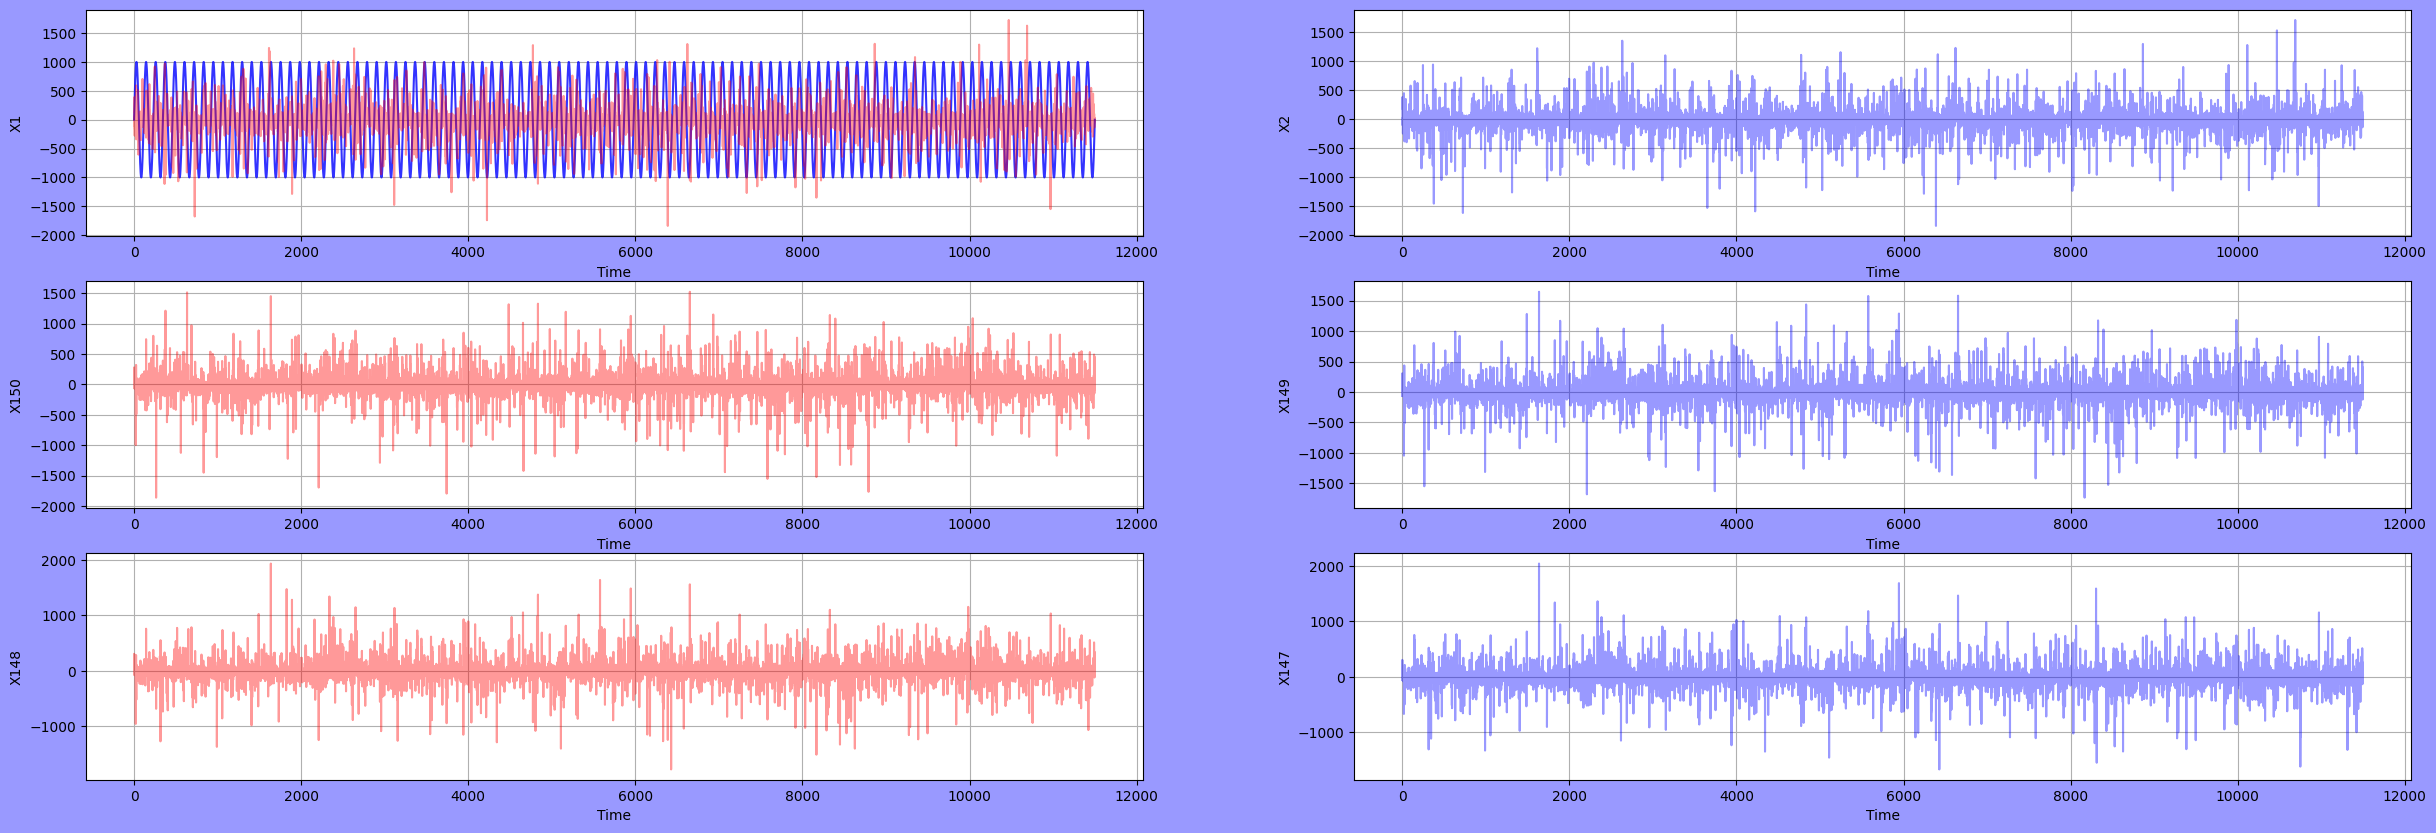

In [ ]:
fig , axes= plt.subplots(3, 2, figsize=(30, 10))
axes[0][0].plot(sin, linestyle='-', color='blue', alpha=0.8)
plot("X1", x, "red", axes[0][0])
plot("X2", x, "blue", axes[0][1])
plot("X150", x, "red", axes[1][0])
plot("X149", x, "blue", axes[1][1])
plot("X148", x, "red", axes[2][0])
plot("X147", x, "blue", axes[2][1])
plt.show()

In [ ]:
def convert_fourier(signal):
  """Converts a signal to its Fourier transform.

  Args:
    signal: The input signal (can be a single value or an array-like).

  Returns:
    The Fourier transform of the signal.
  """
  signal_numeric = pd.to_numeric(signal, errors='coerce')

  if np.isscalar(signal_numeric):
    if np.isnan(signal_numeric):
      return np.nan
    else:

      fft_values = np.fft.fft([signal_numeric])

  else:
    signal_numeric = signal_numeric[~np.isnan(signal_numeric)]
    fft_values = np.fft.fft(signal_numeric)


  return np.array(abs(fft_values))

In [ ]:
df_copy = df.copy()

In [ ]:
column_names = df.columns
columns = column_names[1:179]

In [ ]:
columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       ...
       'X169', 'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177',
       'X178'],
      dtype='object', length=178)

In [ ]:
df_copy = df.copy()

column_names = df.columns
columns = column_names[1:179]


for i in columns:
  df_copy[i] = df_copy[i].apply(convert_fourier)
  df_copy[i] = df_copy[i].apply(lambda x: x[0] if isinstance(x, np.ndarray) else x)

In [ ]:
# df_copy['X1'] = df_copy['X1'].apply(lambda x: x[0])

In [ ]:
# print(df_copy['X1'])

In [ ]:
df_copy

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135.0,190.0,229.0,223.0,192.0,125.0,55.0,9.0,33.0,...,17.0,15.0,31.0,77.0,103.0,127.0,116.0,83.0,51.0,4
1,X15.V1.924,386.0,382.0,356.0,331.0,320.0,315.0,307.0,272.0,244.0,...,164.0,150.0,146.0,152.0,157.0,156.0,154.0,143.0,129.0,1
2,X8.V1.1,32.0,39.0,47.0,37.0,32.0,36.0,57.0,73.0,85.0,...,57.0,64.0,48.0,19.0,12.0,30.0,35.0,35.0,36.0,5
3,X16.V1.60,105.0,101.0,96.0,92.0,89.0,95.0,102.0,100.0,87.0,...,82.0,81.0,80.0,77.0,85.0,77.0,72.0,69.0,65.0,5
4,X20.V1.54,9.0,65.0,98.0,102.0,78.0,48.0,16.0,0.0,21.0,...,4.0,2.0,12.0,32.0,41.0,65.0,83.0,89.0,73.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,22.0,22.0,23.0,26.0,36.0,42.0,45.0,42.0,45.0,...,15.0,16.0,12.0,5.0,1.0,18.0,37.0,47.0,48.0,2
11496,X19.V1.354,47.0,11.0,28.0,77.0,141.0,211.0,246.0,240.0,193.0,...,65.0,33.0,7.0,14.0,27.0,48.0,77.0,117.0,170.0,1
11497,X8.V1.28,14.0,6.0,13.0,16.0,10.0,26.0,27.0,9.0,4.0,...,65.0,48.0,61.0,62.0,67.0,30.0,2.0,1.0,8.0,5
11498,X10.V1.932,40.0,25.0,9.0,12.0,2.0,12.0,7.0,19.0,22.0,...,121.0,135.0,148.0,143.0,116.0,86.0,68.0,59.0,55.0,3


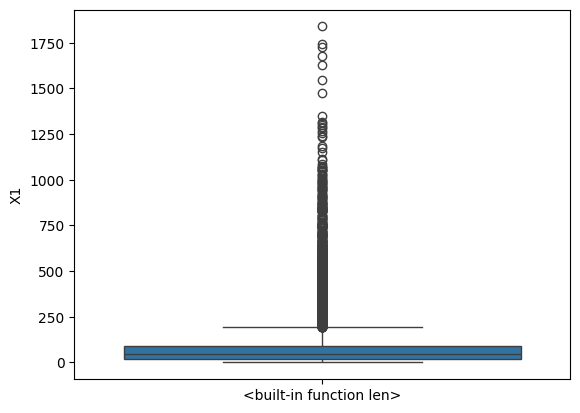

In [ ]:
sns.boxplot(x=len, y="X1", data=df_copy)
plt.show()

In [ ]:
x= df_copy.drop(["y", "Unnamed"], axis=1)
y= df_copy["y"]

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
sc = StandardScaler()
nr= Normalizer()

In [ ]:
x_standard = pd.DataFrame(sc.fit_transform(x))

In [ ]:
df_new = pd.concat([x_standard, y], axis=1)

In [ ]:
df_new

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,y
0,0.336564,0.721323,1.020943,0.999127,0.773413,0.278765,-0.233595,-0.567704,-0.390581,-0.356722,...,-0.499280,-0.509039,-0.401020,-0.085129,0.099766,0.283252,0.211518,-0.027557,-0.260266,4
1,2.115644,2.082045,1.938876,1.793044,1.717157,1.676126,1.615564,1.351024,1.148164,1.076237,...,0.549502,0.442453,0.398155,0.436991,0.479088,0.490950,0.485934,0.406049,0.295934,1
2,-0.393497,-0.348827,-0.294519,-0.368177,-0.406268,-0.375788,-0.218919,-0.100789,-0.011364,0.056916,...,-0.213897,-0.163683,-0.282881,-0.488901,-0.539462,-0.411463,-0.373421,-0.374441,-0.367227,5
3,0.123925,0.090572,0.059644,0.036133,0.013993,0.058129,0.111288,0.096191,0.003221,-0.053880,...,-0.035533,-0.043865,-0.060502,-0.085129,-0.026675,-0.074849,-0.106227,-0.128731,-0.160435,5
4,-0.556520,-0.164563,0.074100,0.109644,-0.067110,-0.287534,-0.519774,-0.633364,-0.478093,-0.201608,...,-0.592029,-0.600664,-0.533057,-0.398401,-0.335752,-0.160793,-0.026790,0.015804,-0.103389,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-0.464377,-0.469308,-0.467987,-0.449039,-0.376776,-0.331661,-0.306974,-0.326951,-0.303070,-0.275472,...,-0.513549,-0.501991,-0.533057,-0.586364,-0.616731,-0.497407,-0.358978,-0.287720,-0.281658,2
11496,-0.287177,-0.547266,-0.431847,-0.074133,0.397389,0.911255,1.167950,1.117567,0.776240,0.367144,...,-0.156820,-0.382174,-0.567804,-0.523709,-0.434095,-0.282547,-0.070119,0.218153,0.588296,1
11497,-0.521080,-0.582701,-0.540265,-0.522549,-0.568474,-0.449334,-0.439057,-0.567704,-0.602068,-0.533995,...,-0.156820,-0.276452,-0.192539,-0.189553,-0.153115,-0.411463,-0.611730,-0.620151,-0.566889,5
11498,-0.336793,-0.448046,-0.569176,-0.551954,-0.627458,-0.552297,-0.585816,-0.494748,-0.470800,-0.423199,...,0.242716,0.336731,0.412054,0.374336,0.191084,-0.010391,-0.135113,-0.200999,-0.231743,3


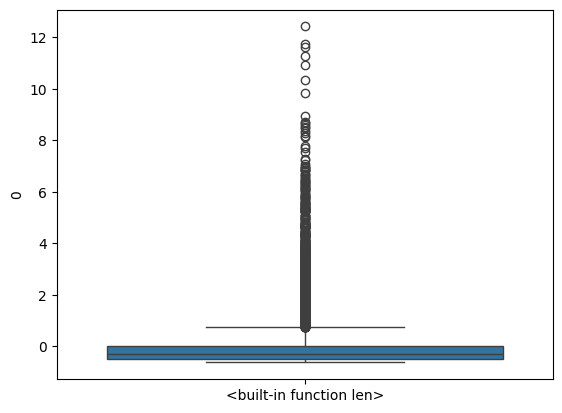

In [ ]:
sns.boxplot(x=len, y=x_standard[0], data=df_copy)
plt.show()

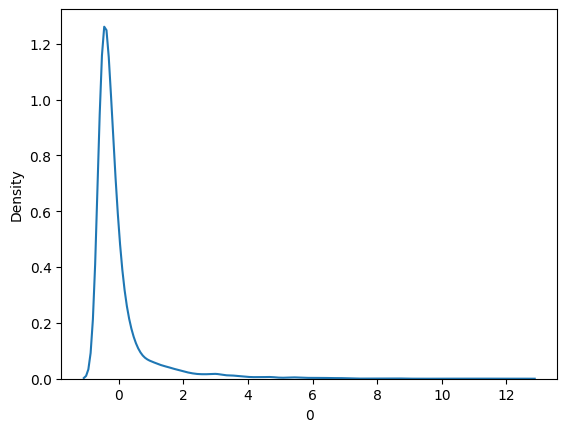

In [ ]:
sns.kdeplot(x_standard[0])
plt.show()

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [ ]:
# for i in range(177):
#   df_new = remove_outliers(df_new, i)

In [ ]:
df_new.shape

(11500, 179)

In [ ]:
df_copy.shape

(11500, 180)

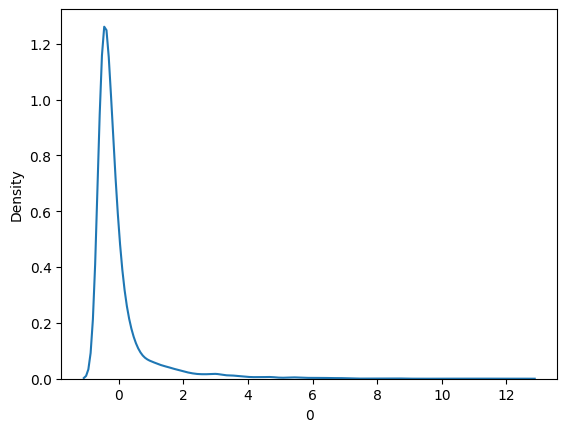

In [ ]:
sns.kdeplot(df_new[0])
plt.show()

In [ ]:
x_normalized = pd.DataFrame(nr.fit_transform(x))

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
y_onehot = pd.DataFrame(OneHotEncoder().fit_transform(y.values.reshape(-1, 1)).toarray())

In [ ]:
y_onehot

,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
11495,0.0,1.0,0.0,0.0,0.0
11496,1.0,0.0,0.0,0.0,0.0
11497,0.0,0.0,0.0,0.0,1.0
11498,0.0,0.0,1.0,0.0,0.0


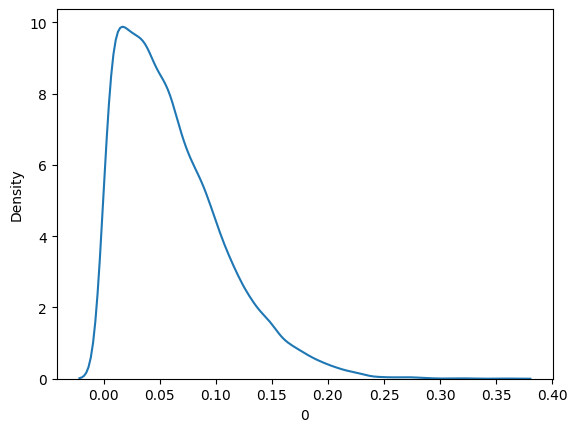

In [ ]:
sns.kdeplot((x_normalized[0]))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_standard, y_onehot, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# rf = RandomForestClassifier(n_estimators=200, random_state=42)
# rf.fit(x_train, y_train)

In [ ]:
# y_pred = rf.predict(x_test)

In [ ]:
# accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [ ]:
param_grid = {
    'max_depth': [8,10,15, 20, 30, None],
    'min_samples_split': [2, 5, 10,15,12],
}
dtree_cla = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dtree_cla, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_dtree_cls = grid_search.best_estimator_
y_pred = best_dtree_cls.predict(x_test)
params = grid_search.best_params_
print(f"Best Parameters: {params}")
print(best_dtree_cls)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'max_depth': 8, 'min_samples_split': 15}
DecisionTreeClassifier(max_depth=8, min_samples_split=15, random_state=42)


In [ ]:
dtree= DecisionTreeClassifier(max_depth=8, min_samples_split=15)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=15)

In [ ]:
y_pred_dtree= dtree.predict(x_test)

In [ ]:
# for i in range(len(y_pred)):
#   max = np.max(y_pred[i])
#   for j in range(len(y_pred[i])):
#     if y_pred[i][j] == max:
#       y_pred[i][j] =1
#     else:
#       y_pred[i][j] =0


In [ ]:
y_pred_dtree

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
accuracy_score(y_test, y_pred_dtree)

0.22130434782608696

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, None]
}
r_reg = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=r_reg, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_r_classifier= grid_search.best_estimator_
y_pred = best_r_classifier.predict(x_test)
params = grid_search.best_params_
print(f"Best Parameters: {params}")
print(best_r_classifier)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_pa

Best Parameters: {'n_estimators': 50}
RandomForestClassifier(n_estimators=50, random_state=42)


In [ ]:
r_cl = RandomForestClassifier(n_estimators=50, random_state=42)
r_cl.fit(x_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
y_pred_ran= r_cl.predict(x_test)

In [ ]:
accuracy_score(y_pred_ran, y_test)

0.20434782608695654

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  LSTM, Dense, GRU, Bidirectional, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical


In [ ]:
y_train.shape

(9200, 5)

In [ ]:
input = Input(shape=(178,))
dense1 = Dense(100, activation='relu')(input)
reshape = tf.keras.layers.Reshape((1, 100))(dense1)
lstm0= Bidirectional(LSTM(100, return_sequences=True))(reshape)
lstm1= LSTM(100, return_sequences=True)(lstm0)
lstm2= LSTM(100, return_sequences=False)(lstm1)
output = Dense(5, activation='softmax')(lstm2)
model = Model(inputs=input, outputs=output)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 178)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          17,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 1, 200)              │         160,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 1, 100)              │         120,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 380,005 (1.45 MB)

 Trainable params: 380,005 (1.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3951 - loss: 1.2951 - val_accuracy: 0.4283 - val_loss: 1.1795
Epoch 2/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4649 - loss: 1.1484 - val_accuracy: 0.4583 - val_loss: 1.1413
Epoch 3/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4751 - loss: 1.1128 - val_accuracy: 0.5152 - val_loss: 1.0790
Epoch 4/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5618 - loss: 0.9544 - val_accuracy: 0.5878 - val_loss: 0.8992
Epoch 5/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6113 - loss: 0.8301 - val_accuracy: 0.6083 - val_loss: 0.8579
Epoch 6/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6376 - loss: 0.7635 - val_accuracy: 0.6191 - val_loss: 0.8498
Epoch 7/100
288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6607 - loss: 0.7251 - val_accuracy: 0.6178 - val_loss: 0.8592
Epoch 7: early stopping


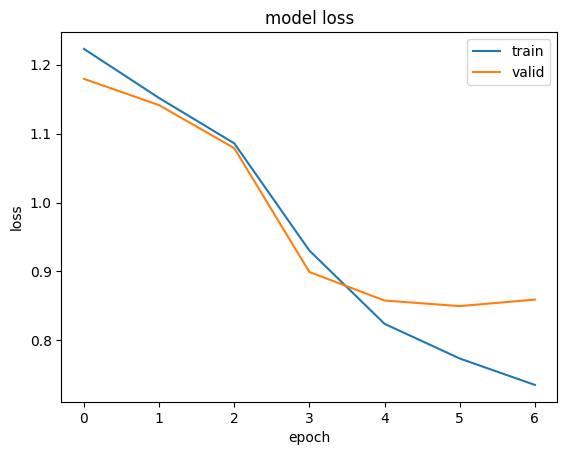

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')